In [1]:
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import alphashape
from shapely.geometry import Point, Polygon
import os


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
def is_point_inside_polygon(point, polygon):
    return polygon.contains(Point(point[0], point[1]))

[[141.343   92.6816]
 [144.238   91.8672]
 [143.352   89.8844]
 [140.469   90.9137]
 [141.343   92.6816]]


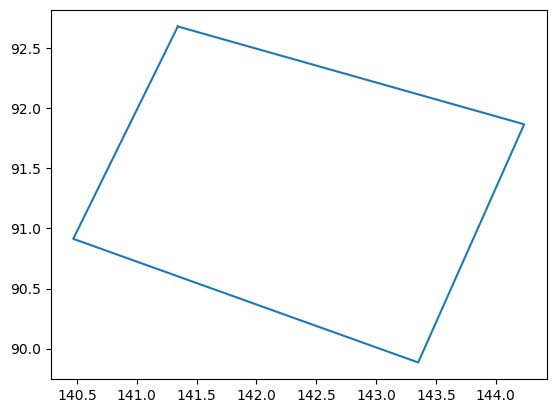

In [7]:
pcd = o3d.io.read_point_cloud(os.path.join("../milestone1/boundaries","obst_Vertices_1.ply"))
vertices = np.asarray(pcd.points)[:,:2] 
print(vertices)

plt.plot(vertices[:,0], vertices[:,1])
plt.show()

In [9]:

polygon = Polygon(vertices)
test_point = [140.9, 91.0]
print(is_point_inside_polygon(test_point, polygon))

True


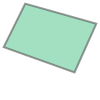

In [10]:
polygon

In [11]:
class PolygonMap:
    def __init__(self, boundary_ply, obstacle_ply_list):
        self.boundary = self.load_polygon(boundary_ply)
        self.obstacles = [self.load_polygon(ply) for ply in obstacle_ply_list]

    def load_polygon(self, ply_file):
        pcd = o3d.io.read_point_cloud(ply_file)
        vertices = np.asarray(pcd.points)[:, :2] 
        return Polygon(vertices)

    def is_valid_robot_pos(self, robot_polygon):

        robot_shape = Polygon(robot_polygon)

        if not robot_shape.within(self.boundary):
            return False, "Robot is outside the boundary"

        for obs in self.obstacles:
            if robot_shape.intersects(obs):
                return False, "Robot collides with an obstacle"

        return True, "Robot is in free space"

    def visualize(self, robot_polygon=None):
        fig, ax = plt.subplots(figsize=(8, 8))

        # Plot boundary
        bx, by = self.boundary.exterior.xy
        ax.plot(bx, by, 'b-', linewidth=2, label="Boundary")
        ax.fill(bx, by, 'cyan', alpha=0.2)

        # Plot obstacles
        for i, obs in enumerate(self.obstacles):
            ox, oy = obs.exterior.xy
            ax.plot(ox, oy, 'r-', linewidth=2)
            ax.fill(ox, oy, 'red', alpha=0.4)

        # Plot robot polygon
        if robot_polygon:
            rx, ry = zip(*robot_polygon) 
            ax.plot(rx + (rx[0],), ry + (ry[0],), 'g-', linewidth=2, label="Robot")  
            ax.fill(rx, ry, 'green', alpha=0.5)

        ax.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Polygon Map with Obstacles and Robot")
        plt.grid(True)
        plt.show()


In [12]:
folder = "milestone1"
boundary_file = os.path.join(folder, "milestone1_vertices.ply")
obstacle_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.startswith("obst")]


FileNotFoundError: [Errno 2] No such file or directory: 'milestone1'

In [13]:
polygon_map = PolygonMap(boundary_file, obstacle_files)


NameError: name 'obstacle_files' is not defined

In [14]:

robot_footprint = [(140, 80), (145, 80), (145, 75), (140, 75)] 
print( polygon_map.is_valid_robot_pos(robot_footprint))
polygon_map.visualize(robot_footprint)



NameError: name 'polygon_map' is not defined

In [15]:

class PolygonMap:
    def __init__(self, boundary_ply, obstacle_ply_list):
        self.boundary = self.load_polygon(boundary_ply)
        self.obstacles = [self.load_polygon(ply) for ply in obstacle_ply_list]

    def load_polygon(self, ply_file):
        pcd = o3d.io.read_point_cloud(ply_file)
        vertices = np.asarray(pcd.points)[:, :2] 
        return Polygon(vertices)

    def is_valid_robot_pos(self, center, length, width):
    
        robot_polygon = self.get_robot_polygon(center, length, width)
        robot_shape = Polygon(robot_polygon)

        if not robot_shape.within(self.boundary):
            return False, "Robot is outside the boundary"

        for obs in self.obstacles:
            if robot_shape.intersects(obs):
                return False, "Robot collides with an obstacle"

        return True, "Robot is in free space"

    def get_robot_polygon(self, center, length, width):

        cx, cy = center
        half_length = length / 2
        half_width = width / 2

        return [
            (cx - half_length, cy - half_width),  
            (cx + half_length, cy - half_width),  
            (cx + half_length, cy + half_width), 
            (cx - half_length, cy + half_width)  
        ]

    def visualize(self, center=None, length=None, width=None):
        fig, ax = plt.subplots(figsize=(8, 8))

        # Plot boundary
        bx, by = self.boundary.exterior.xy
        ax.plot(bx, by, 'b-', linewidth=2, label="Boundary")
        ax.fill(bx, by, 'cyan', alpha=0.2)

        # Plot obstacles
        for i, obs in enumerate(self.obstacles):
            ox, oy = obs.exterior.xy
            ax.plot(ox, oy, 'r-', linewidth=2)
            ax.fill(ox, oy, 'red', alpha=0.4)

        # Plot robot polygon
        if center and length and width:
            robot_polygon = self.get_robot_polygon(center, length, width)
            rx, ry = zip(*robot_polygon) 
            ax.plot(rx + (rx[0],), ry + (ry[0],), 'g-', linewidth=2, label="Robot")  
            ax.fill(rx, ry, 'green', alpha=0.5)

        ax.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Polygon Map with Obstacles and Robot")
        plt.grid(True)
        plt.show()


Robot is in free space


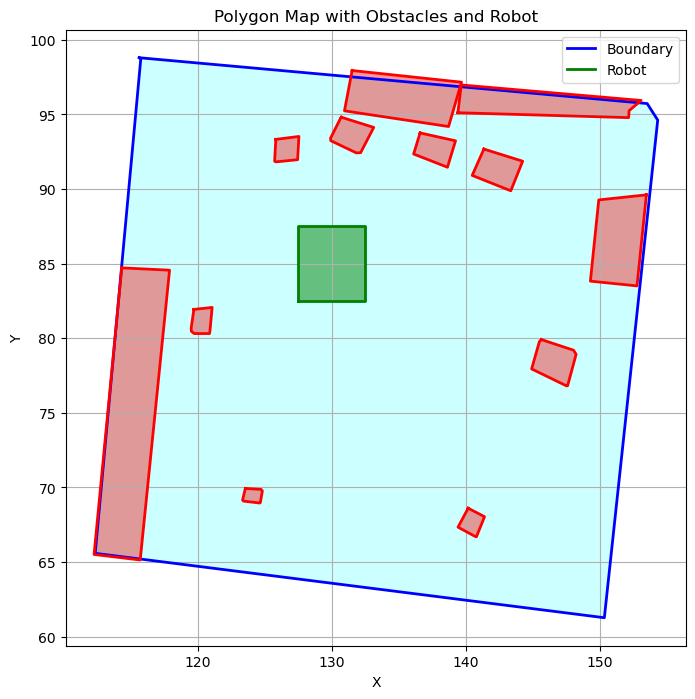

In [18]:

polygon_map = PolygonMap(boundary_file, obstacle_files)
car_center = (130, 85)  
car_length = 5  
car_width = 5 

valid, message = polygon_map.is_valid_robot_pos(car_center, car_length, car_width)
print(message)

# Visualize with the car
polygon_map.visualize(car_center, car_length, car_width)


In [3]:
class PolygonMap:
    def __init__(self, boundary_ply, obstacle_ply_list):
        self.boundary = self.load_polygon(boundary_ply)
        self.obstacles = [self.load_polygon(ply) for ply in obstacle_ply_list]

    def load_polygon(self, ply_file):
        pcd = o3d.io.read_point_cloud(ply_file)
        vertices = np.asarray(pcd.points)[:, :2]  
        return Polygon(vertices)

    def is_valid_robot_pos(self, center, length, width):
        robot_polygon = self.get_robot_polygon(center, length, width)
        robot_shape = Polygon(robot_polygon)

        if not robot_shape.within(self.boundary):
            return False, "Outside boundary"

        for obs in self.obstacles:
            if robot_shape.intersects(obs):
                return False, "Collision with obstacle"

        return True, "Safe position"

    def get_robot_polygon(self, center, length, width):
        cx, cy = center
        half_length = length / 2
        half_width = width / 2

        return [
            (cx - half_length, cy - half_width),
            (cx + half_length, cy - half_width),
            (cx + half_length, cy + half_width),
            (cx - half_length, cy + half_width)
        ]

    def is_trajectory_safe(self, trajectory, length, width):
        for point in trajectory:
            valid, message = self.is_valid_robot_pos(point, length, width)
            if not valid:
                return False, f"Unsafe at {point}: {message}"
        return True, "Trajectory is safe"

    def visualize(self, trajectory=None, length=None, width=None):
        fig, ax = plt.subplots(figsize=(8, 8))

        # Plot boundary
        bx, by = self.boundary.exterior.xy
        ax.plot(bx, by, 'b-', linewidth=2, label="Boundary")
        ax.fill(bx, by, 'cyan', alpha=0.2)

        # Plot obstacles
        for i, obs in enumerate(self.obstacles):
            ox, oy = obs.exterior.xy
            ax.plot(ox, oy, 'r-', linewidth=2)
            ax.fill(ox, oy, 'red', alpha=0.4)

        # Plot trajectory
        if trajectory:
            tx, ty = zip(*trajectory)
            ax.plot(tx, ty, 'm--', linewidth=2, label="Trajectory")

        # Plot robot at start and end
        if trajectory and length and width:
            start_robot = self.get_robot_polygon(trajectory[0], length, width)
            end_robot = self.get_robot_polygon(trajectory[-1], length, width)

            for robot_polygon, color, label in zip([start_robot, end_robot], ['green', 'orange'], ["Start", "End"]):
                rx, ry = zip(*robot_polygon)
                ax.plot(rx + (rx[0],), ry + (ry[0],), color, linewidth=2, label=f"Robot - {label}")
                ax.fill(rx, ry, color, alpha=0.5)

        ax.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Polygon Map with Obstacles and Trajectory")
        plt.grid(True)
        plt.show()


True
Trajectory is safe


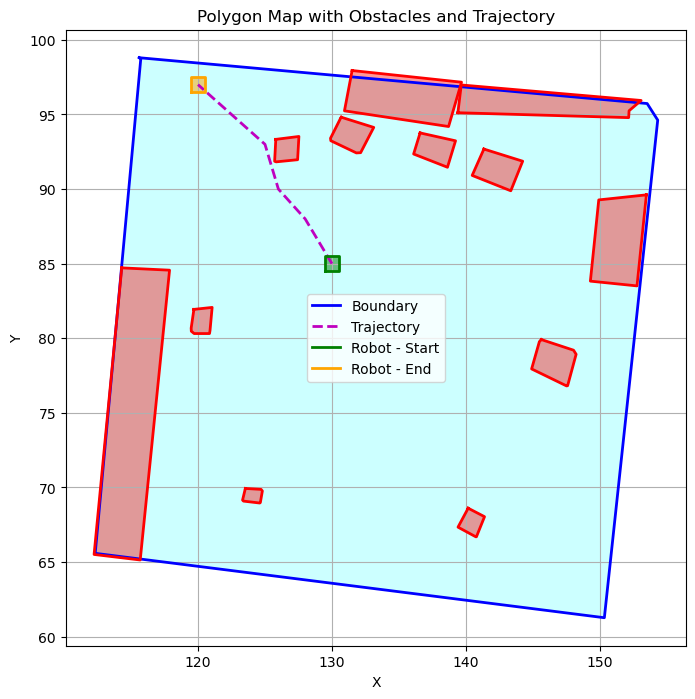

In [6]:
trajectory = [(130, 85), (128, 88), (126, 90), (125, 93), (120, 97)]
car_length = 1
car_width = 1
polygon_map = PolygonMap(boundary_file, obstacle_files)

# Check if trajectory is safe
is_safe, message = polygon_map.is_trajectory_safe(trajectory, length=car_length, width=car_width)
print(is_safe)
print(message)

# Visualize the map with trajectory
polygon_map.visualize(trajectory=trajectory, length=car_length, width=car_width)

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
from shapely.geometry import Polygon, Point

class PolygonMap:
    def __init__(self, boundary_ply, obstacle_ply_list):
        self.boundary = self.load_polygon(boundary_ply)
        self.obstacles = [self.load_polygon(ply) for ply in obstacle_ply_list]

    def load_polygon(self, ply_file):
        pcd = o3d.io.read_point_cloud(ply_file)
        vertices = np.asarray(pcd.points)[:, :2]  
        return Polygon(vertices)

    def is_valid_robot_pos(self, center, radius):
        # robot_polygon = self.get_robot_polygon(center, length, width)
        # robot_shape = Polygon(robot_polygon)

        robot_shape = Point(center).buffer(radius)

        if not robot_shape.within(self.boundary):
            return False, "Outside boundary"

        for obs in self.obstacles:
            if robot_shape.intersects(obs):
                return False, "Collision with obstacle"

        return True, "Safe position"

    # def get_robot_polygon(self, center, length, width):
    #     cx, cy = center
    #     half_length = length / 2
    #     half_width = width / 2

    #     return [
    #         (cx - half_length, cy - half_width),
    #         (cx + half_length, cy - half_width),
    #         (cx + half_length, cy + half_width),
    #         (cx - half_length, cy + half_width)
    #     ]

    def is_trajectory_safe(self, trajectory, radius):
        for point in trajectory:
            valid, message = self.is_valid_robot_pos(point, radius)
            if not valid:
                return False, f"Unsafe at {point}: {message}"
        return True, "Trajectory is safe"

    def visualize(self, trajectory=None, radius=None):
        fig, ax = plt.subplots(figsize=(8, 8))

        # Plot boundary
        bx, by = self.boundary.exterior.xy
        ax.plot(bx, by, 'b-', linewidth=2, label="Boundary")
        ax.fill(bx, by, 'cyan', alpha=0.2)

        # Plot obstacles
        for i,obs in enumerate(self.obstacles):
            ox, oy = obs.exterior.xy
            ax.plot(ox, oy, 'r-', linewidth=2)
            ax.fill(ox, oy, 'red', alpha=0.4)

        # Plot trajectory
        if trajectory:
            tx, ty = zip(*trajectory)
            ax.plot(tx, ty, 'm--', linewidth=2, label="Trajectory")

        # Plot robot at start and end
        if trajectory and radius:
            for center, color, label in zip([trajectory[0], trajectory[-1]], ['green', 'orange'], ["Start", "End"]):
                circle = plt.Circle(center, radius, color=color, alpha=0.5, label=f"Robot - {label}")
                ax.add_patch(circle)

        ax.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Polygon Map with Obstacles and Trajectory")
        plt.grid(True)
        plt.show()


True
Trajectory is safe


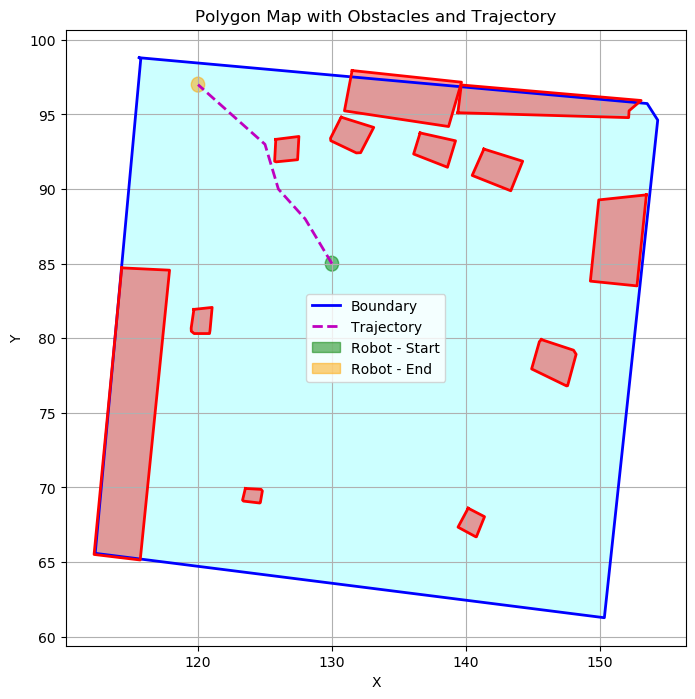

In [5]:
import os
"""for testing"""

folder = "../milestone1/boundaries"
boundary_file = os.path.join(folder, "milestone1_vertices.ply")
obstacle_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.startswith("obst")]

trajectory = [(130, 85), (128, 88), (126, 90), (125, 93), (120, 97)]
robot_radius = 0.5
polygon_map = PolygonMap(boundary_file, obstacle_files)

# Check if trajectory is safe
is_safe, message = polygon_map.is_trajectory_safe(trajectory, radius=robot_radius)
print(is_safe)
print(message)

# Visualize the map with trajectory
polygon_map.visualize(trajectory=trajectory, radius=robot_radius)


# Planning Simulation

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
from shapely.geometry import Polygon, Point

class PolygonMap:
    def __init__(self, boundary_ply, obstacle_ply_list):
        self.boundary = self.load_polygon(boundary_ply)
        self.obstacles = [self.load_polygon(ply) for ply in obstacle_ply_list]

    def load_polygon(self, ply_file):
        pcd = o3d.io.read_point_cloud(ply_file)
        vertices = np.asarray(pcd.points)[:, :2]  
        return Polygon(vertices)

    def is_valid_robot_pos(self, center, radius):
        # robot_polygon = self.get_robot_polygon(center, length, width)
        # robot_shape = Polygon(robot_polygon)

        robot_shape = Point(center).buffer(radius)

        if not robot_shape.within(self.boundary):
            return False, "Outside boundary"

        for obs in self.obstacles:
            if robot_shape.intersects(obs):
                return False, "Collision with obstacle"

        return True, "Safe position"

    # def get_robot_polygon(self, center, length, width):
    #     cx, cy = center
    #     half_length = length / 2
    #     half_width = width / 2

    #     return [
    #         (cx - half_length, cy - half_width),
    #         (cx + half_length, cy - half_width),
    #         (cx + half_length, cy + half_width),
    #         (cx - half_length, cy + half_width)
    #     ]

    def is_trajectory_safe(self, trajectory, radius):
        for point in trajectory:
            valid, message = self.is_valid_robot_pos(point, radius)
            if not valid:
                return False, f"Unsafe at {point}: {message}"
        return True, "Trajectory is safe"

    def visualize(self, trajectory=None, radius=None):
        fig, ax = plt.subplots(figsize=(8, 8))

        # Plot boundary
        bx, by = self.boundary.exterior.xy
        ax.plot(bx, by, 'b-', linewidth=2, label="Boundary")
        ax.fill(bx, by, 'cyan', alpha=0.2)

        # Plot obstacles
        for i,obs in enumerate(self.obstacles):
            ox, oy = obs.exterior.xy
            ax.plot(ox, oy, 'r-', linewidth=2)
            ax.fill(ox, oy, 'red', alpha=0.4)

        # Plot trajectory
        if trajectory:
            tx, ty = zip(*trajectory)
            ax.plot(tx, ty, 'm--', linewidth=2, label="Trajectory")

        # Plot robot at start and end
        if trajectory and radius:
            for center, color, label in zip([trajectory[0], trajectory[-1]], ['green', 'orange'], ["Start", "End"]):
                circle = plt.Circle(center, radius, color=color, alpha=0.5, label=f"Robot - {label}")
                ax.add_patch(circle)

        ax.legend()
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Polygon Map with Obstacles and Trajectory")
        plt.grid(True)
        plt.show()


In [19]:
import os
"""for testing"""

folder = "../milestone1/boundaries"
boundary_file = os.path.join(folder, "milestone1_vertices.ply")
obstacle_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.startswith("obst")]

polygon_map = PolygonMap(boundary_file, obstacle_files)

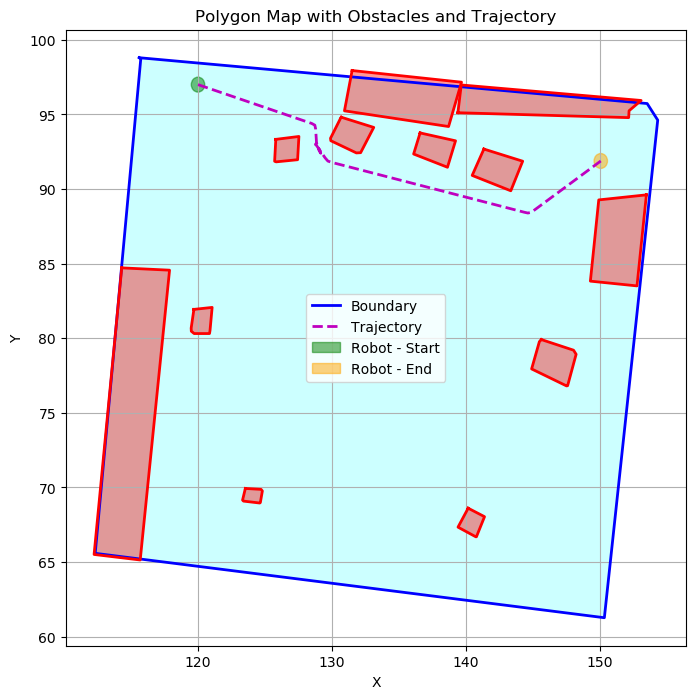

In [17]:
from local_planner import execute_planning


start = (120,97)
goal = (150,92)

path, _, _, _ = execute_planning(start, goal) 
path_clean = [(p[0],p[1]) for p in path]

# Visualize the map with trajectory
polygon_map.visualize(trajectory=path_clean, radius=robot_radius)


In [22]:
from local_planner import execute_planning


start = (120,97)
goal = (150,65)

path, _, _, _ = execute_planning(start, goal) 
path_clean = [(p[0],p[1]) for p in path]

# Visualize the map with trajectory
polygon_map.visualize(trajectory=path_clean, radius=robot_radius)


KeyboardInterrupt: 